___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" />


# PRIMER EXAMEN PARCIAL
# SIMULACIÓN DE PROCESOS FINANCIEROS

## Nombre:

## Fecha: 16 de marzo 2018

In [39]:
import numpy as np
import scipy as sc

# 1.
La financiera ”El cerdito feliz” atiende la apertura de cuentas de ahorro en su sucursal matriz, en esta sucursal se tienen 4 ejecutivos para atención al inversionista, teniendo una media de tiempo promedio para la atención de un cliente de 30 minutos, aunque con frecuencia se requiere que uno de los ejecutivos participe en juntas de evaluación de crédito, lo que provoca que el equipo de atención disminuya a 3 ejecutivos y en estas circunstancias el promedio de atención por cliente aumenta a 45 minutos. El tiempo entre la llegada de un cliente y otro nuevo es de 25 a 35 minutos, siguiendo una distribución uniforme (constante), si la sucursal apertura a las 9:00 a.m. y cierra su atención al público a las 14:00 horas, realiza una simulación de 1000 veces (escenarios) y responde
   
   a). ¿Cuántas personas se atenderán hasta las 14:00 horas, si el equipo está formado solo por 3 ejecutivos?, ¿cuántos quedarán en cola?
   
   b). ¿Cuántas personas se atenderán hasta las 14:00 horas, si el equipo está formado solo por 4 ejecutivos?, ¿Cuántos quedarán en cola?


In [48]:
def p():
    ti = 0
    t = []
    while ti < 300:
        ti = 0
        t.append(np.random.uniform(25,35.1))
        ti = sum(t)
        
    return t
    

In [50]:
pred = [p() for i in range(1000)]

# a)

In [65]:
a = list(map(lambda x: len(x),pred ))
at = int(300/45)
col = list(map(lambda x: x - at, a))

### Los clientes atendidos son 6.
### Los que se quedan en la fila depende, varian entre 4 y 5.

# b)

In [84]:
b = list(map(lambda x: len(x),pred ))
bt = int(300/30)
col = list(map(lambda x: x - bt, b))


### Los clientes atendidos son 10.
### Los que se quedan en la fila depende, varian entre 0 y 1.

# 2 
a). Demuestre que la distribución de poisson satisface la siguiente forma recursiva de su probabilidad
$$ p(k+1)={\lambda \over k+1}p(k)$$

Realizar todo el desarrollo matemático en mardown usando ecuaciones latex.

b). De el resultado demostrado en el inciso a) genere aletoriamente muestras que distribuyan poisson con parámetro lambda. Compare los resultados con los arrojados por la librería numpy.

\begin{equation}
E=m
\end{equation}

# 3
La PDF de una V.A exponencial esta dada por:
$$f_X(x;\lambda)=\lambda e^{-\lambda x}$$

Encuentre la función de máxima verosimilitud para demostrar que la condición de optimalidad de primer orden conduce a 

$$\hat \lambda = {1\over {1\over n}\sum_{i=1}^nX_i}={1 \over \bar X}$$

# <font color = red> Nota: </font>

Recuerde que maximizar la función de máxima verosimilitud $L(\theta)$ es equivalente a maximizar su logaritmo $l(\theta)= ln(L(\theta))$

> Referencia: Resultados obtenidos del libro:  Paolo Brandimarte -Handbook in Monte Carlo Simulation

# 4
Un banco, de acuerdo a la ley, tienen la posibilidad de poder invertir las utilidades logradas por créditos de trabajo quirografarios en dos diferentes instrumentos de inversión: El primero es inversión en deuda que presenta una utilidad promedio del 23.5% con una desviación estándar de 1.1%. El segundo es inversión a plazo donde la rentabilidad esperada se comporta como una distribución uniforme y está entre el -2% y el 9%, pero nunca entre -0.5% y 0.5%. Calcular cuál es la mejor combinación posible, si la inversión será en múltiplos de 25%, es decir (inv1 25%, Inv2 75%)-(Inv1 50%,Inv2 50%)-(Inv1 75%, Inv2 25%), simular 1000 veces (escenarios) e indicar rendimientos promedio por combinación.

In [25]:
def inv(x1,x2):
    ni = []
    pred = []
    t = 0
    while t < 1000:
        ni.append(np.random.uniform(-2,9.1))
        ni = [i for i in ni if not -.5 < i < .5]
        t = len(ni)
    
    ni = [i/100 for i in ni]
    
    pred1 = (100*x1)*(np.random.normal(23.5,1.1,1000)/100)
    
    pred2 = list(map(lambda x: (100*x2)*x,ni))
    
    pred = pred1 + pred2
    
    return pred
                 

In [38]:
invs = [np.mean(inv(.25,.75)),np.mean(inv(.5,.5)),np.mean(inv(.75,.25))]
invs

[8.6322318100627, 13.678788950455733, 18.577667706531994]

### La mejor opcion es la tercera ya que da el mayor rendimientos, 18.57

# 5
Considere la siguiente función de distribución de probabilidad
$$ f(x)=\begin{cases}400e^{-400(x-1)},& \text{para }x\geq 1\\0,& \text{otro caso}\end{cases}$$

Se desea estimar la media de esta distribución, usando el método montecarlo crudo y sus técnicas de reducción de varianza con muestras de tamaño 10,100 y 1000. 

a). Para realizar una comparación, realice el desarrollo analítico del valor esperado.

b). Realice el desarrollo teórico para obtener muestras aletorias de esta dstribución usando el método de la función inversa. Con los resultados obtenidos, genere 100 muestras y  grafique el histograma de dichas muestras aleatorias obtenidas y a su vez la función de densidad f(x), para validar los resultados obtenidos.

c). Repita el inciso anterior pero en esta ocasión utilice el método de aceptación y rechazo para generar las muestras aleatorias.

d). Use el método de montecarlo crudo para estimar la media.

e). Use el método de muestreo estratificado con 5 estratos $0\leq F(x)\leq0.3, 0.3\leq F(x)\leq0.5, 0.5\leq F(x)\leq0.7, 0.7\leq F(x)\leq0.9 $ y $0.9\leq F(x) \leq 1$. Reparta el total de muestras en los estratos de la siguiente forma: estrato 1, 2, 3, 4, 5, 20%,20%,25%,15% y 20% de las muestras respectivamente.

f). Use el método de los números complementarios.

g). Finalmente use el método de estratificación en el cúal se divide en N estratos.

h). Compare todos los resulados obtenidos con cada método en una tabla unsando la librería pandas, donde muestre segun la cantidad de términos usados, la aproximación de la media aproximada y su error relativo con el valor obtenido en el inciso a).

In [40]:
an = sc.integrate.quad(400*np.exp(-400(x-1)))

AttributeError: module 'scipy' has no attribute 'integrate'

# 6
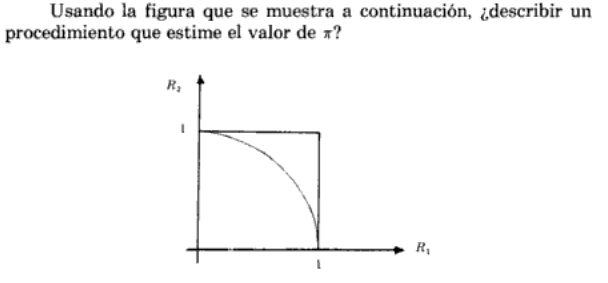

a). Use el método de montecarlo para aproximar el valor de pi para muestras de tamaño 100,1000,10000,1000000 y comparelo con su valor real. 

b). Repita el inciso anterior usando todos los método de reducción de varianza utilizados en el ejercicio *6*, para constrastar los resultados . Explique sus resultados.

**Valor de los ejercicios**
- 1- 2 puntos
- 2- 2 puntos
- 3- 1 punto
- 4- 1 punto
- 5- 3 puntos
- 6- 1 punto

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>